In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from publik import modifier
import knunu_utils

from Bayesian_pyhf import plotting
import arviz as az
import corner

In [2]:
null = knunu_utils.null_pred()
alt = knunu_utils.alt_pred()

In [3]:
model, alt_yields = modifier.load('knunu_model.json', alt.distribution, null.distribution, return_data=True)

## Load and plot samples

In [4]:
post_data = az.from_json( 'samples/nuts_post_data.json')
post_pred = az.from_json( 'samples/nuts_post_pred.json')
prior_pred = az.from_json('samples/nuts_prior_pred.json')

In [5]:
post_data.posterior

<xarray.Dataset>
Dimensions:                   (chain: 4, draw: 10000,
                               FF_decorrelated[0]_dim_0: 1,
                               FF_decorrelated[1]_dim_0: 1,
                               FF_decorrelated[2]_dim_0: 1,
                               FF_decorrelated[3]_dim_0: 1,
                               FF_decorrelated[4]_dim_0: 1,
                               FF_decorrelated[5]_dim_0: 1,
                               FF_decorrelated[6]_dim_0: 1,
                               FF_decorrelated[7]_dim_0: 1, mu_dim_0: 1,
                               stat_dim_0: 12, cvl_dim_0: 1, csl_dim_0: 1,
                               ctl_dim_0: 1)
Coordinates: (12/15)
  * chain                     (chain) int64 0 1 2 3
  * draw                      (draw) int64 0 1 2 3 4 ... 9996 9997 9998 9999
  * FF_decorrelated[0]_dim_0  (FF_decorrelated[0]_dim_0) int64 0
  * FF_decorrelated[1]_dim_0  (FF_decorrelated[1]_dim_0) int64 0
  * FF_decorrelated[2]_dim_0  (FF_decorrelated[2]_dim_0) int64 0
  * FF_decorrelated[3]_dim_0  (FF_decorrelated[3]_dim_0) int64 0
    ...                        ...
  * FF_decorrelated[7]_dim_0  (FF_decorrelated[7]_dim_0) int64 0
  * mu_dim_0                  (mu_dim_0) int64 0
  * stat_dim_0                (stat_dim_0) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * cvl_dim_0                 (cvl_dim_0) int64 0
  * csl_dim_0                 (csl_dim_0) int64 0
  * ctl_dim_0                 (ctl_dim_0) int64 0
Data variables: (12/13)
    FF_decorrelated[0]        (chain, draw, FF_decorrelated[0]_dim_0) float64 ...
    FF_decorrelated[1]        (chain, draw, FF_decorrelated[1]_dim_0) float64 ...
    FF_decorrelated[2]        (chain, draw, FF_decorrelated[2]_dim_0) float64 ...
    FF_decorrelated[3]        (chain, draw, FF_decorrelated[3]_dim_0) float64 ...
    FF_decorrelated[4]        (chain, draw, FF_decorrelated[4]_dim_0) float64 ...
    FF_decorrelated[5]        (chain, draw, FF_decorrelated[5]_dim_0) float64 ...
    ...                        ...
    FF_decorrelated[7]        (chain, draw, FF_decorrelated[7]_dim_0) float64 ...
    mu                        (chain, draw, mu_dim_0) float64 1.0 1.0 ... 1.0
    stat                      (chain, draw, stat_dim_0) float64 1.008 ... 0.9407
    cvl                       (chain, draw, cvl_dim_0) float64 5.292 ... 4.907
    csl                       (chain, draw, csl_dim_0) float64 2.538 ... 3.101
    ctl                       (chain, draw, ctl_dim_0) float64 2.46 ... 1.875
Attributes:
    created_at:                 2023-11-16T12:28:06.576908
    arviz_version:              0.15.1
    inference_library:          pymc
    inference_library_version:  5.6.1
    sampling_time:              11071.996015310287
    tuning_steps:               1000

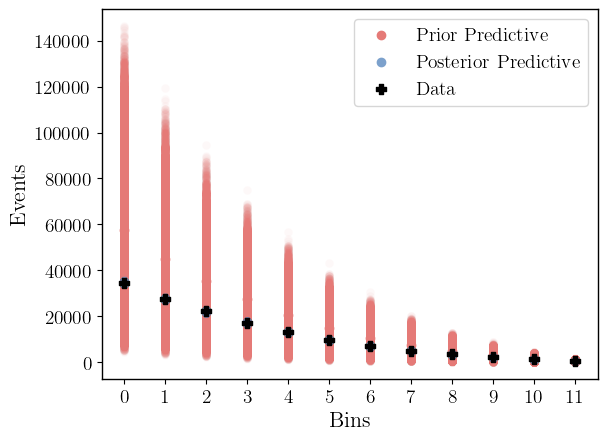

In [6]:
plotting.prior_posterior_predictives(model=model, data=alt_yields, post_pred=post_pred, prior_pred=prior_pred)
plt.show()

array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'FF_decorrelated[0]'}>,
        <Axes: title={'center': 'FF_decorrelated[0]'}>],
       [<Axes: title={'center': 'FF_decorrelated[1]'}>,
        <Axes: title={'center': 'FF_decorrelated[1]'}>],
       [<Axes: title={'center': 'FF_decorrelated[4]'}>,
        <Axes: title={'center': 'FF_decorrelated[4]'}>],
       [<Axes: title={'center': 'FF_decorrelated[3]'}>,
        <Axes: title={'center': 'FF_decorrelated[3]'}>],
       [<Axes: title={'center': 'FF_decorrelated[6]'}>,
        <Axes: title={'center': 'FF_decorrelated[6]'}>],
       [<Axes: title={'center': 'stat'}>,
        <Axes: title={'center': 'stat'}>],
       [<Axes: title={'center': 'ctl'}>, <Axes: title={'center': 'ctl'}>],
       [<Axes: title={'center': 'FF_decorrelated[2]'}>,
        <Axes: title={'center': 'FF_decorrelated[2]'}>],
       [<Axes: title={'center': 'cvl'}>, <Axes: title={'center': 'cvl'}>],
       [<Axes:

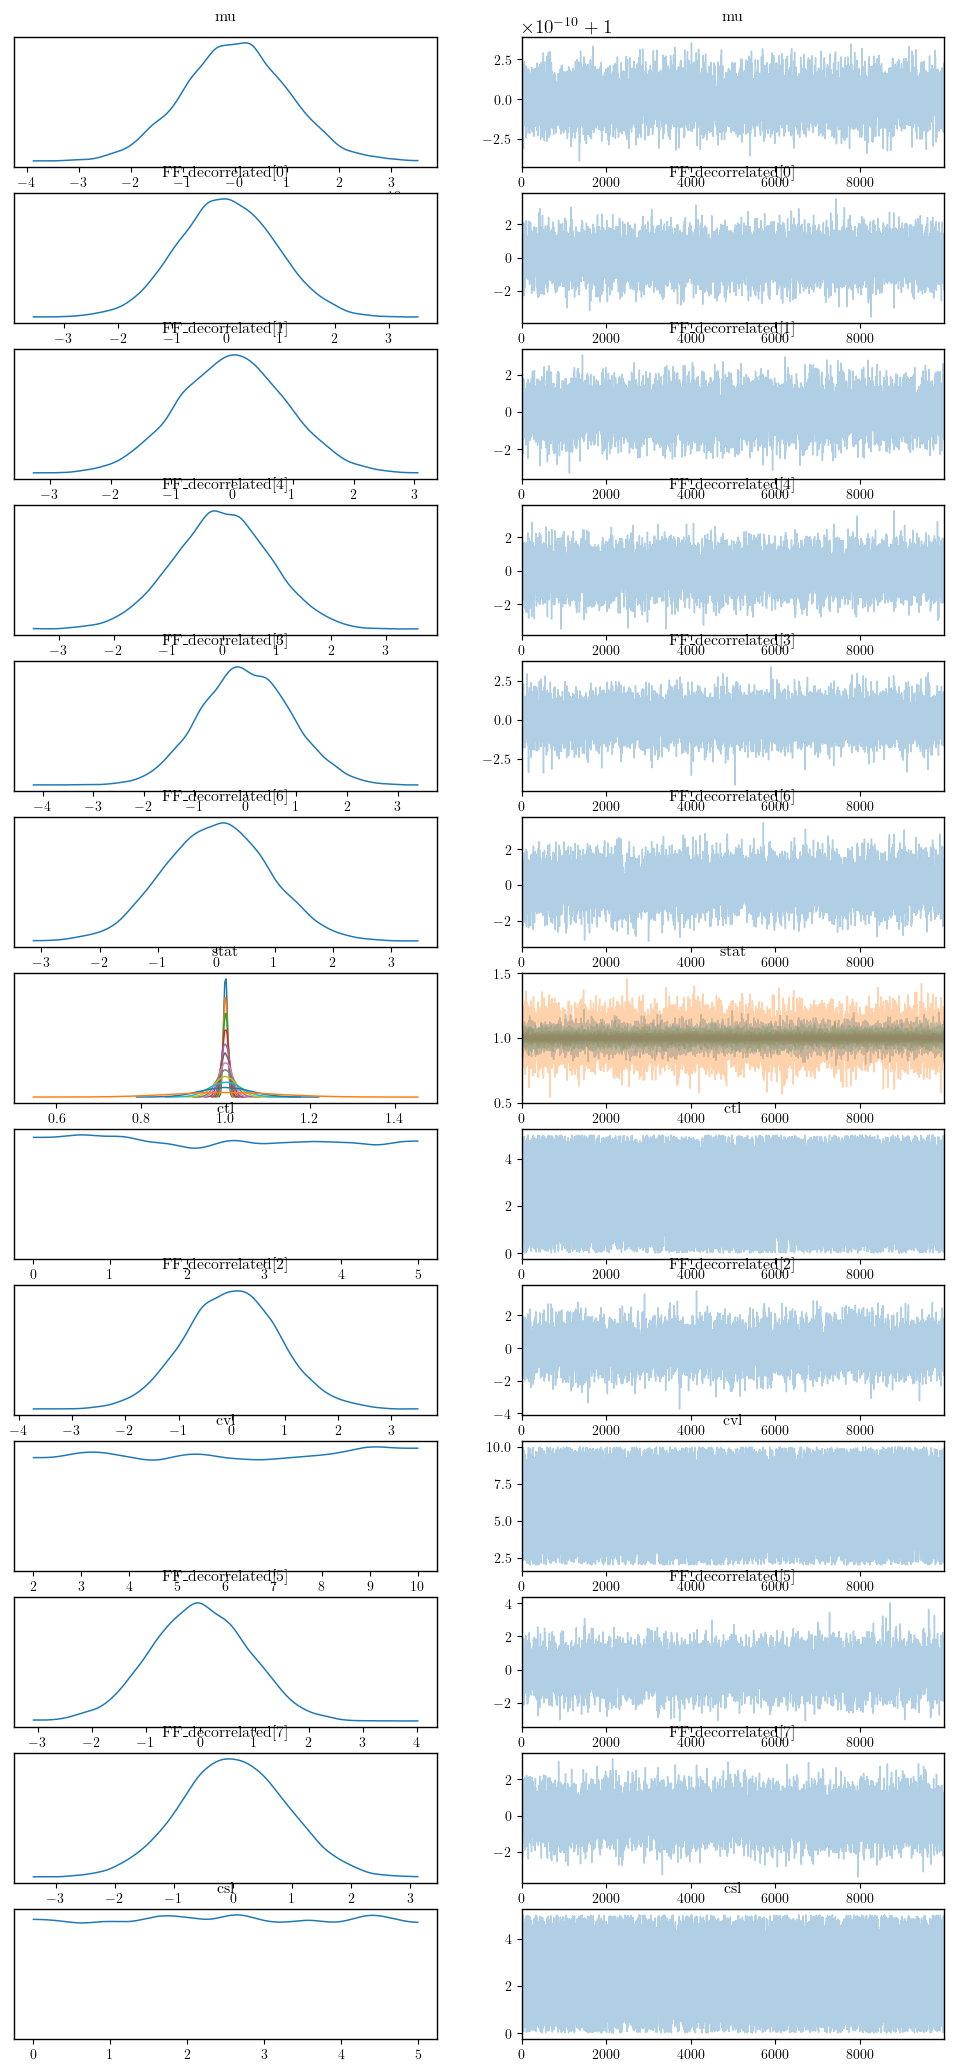

In [7]:
az.plot_trace(prior_pred.prior)

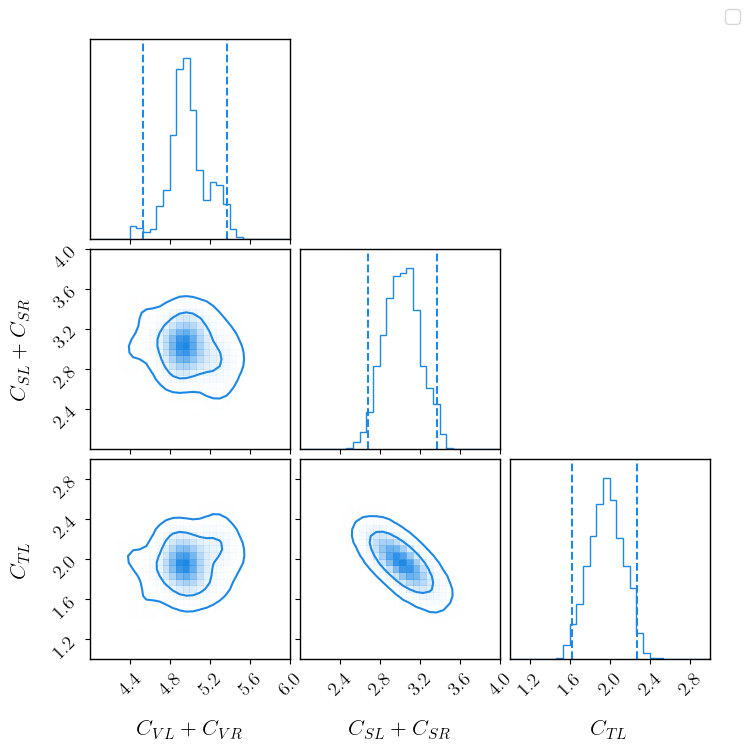

In [8]:
cv = r'$C_{VL} + C_{VR}$'
cs = r'$C_{SL} + C_{SR}$'
ct = r'$C_{TL}$'
labels = [cv, cs, ct]

# file = '../results/samples/posterior_corner.pdf'

fig = corner.corner(post_data.posterior, 
                    var_names=['cvl', 'csl', 'ctl'],
                    bins=30, 
                    levels=(0.68, 0.95), 
                    quantiles=(0.025, 0.975), 
                    range = [(4, 6), (2,4), (1,3)],
                    smooth=1.5,
                    labels=labels,
                    color='#1E88E5',
                    plot_datapoints=False
                    );

handles, labs = fig.axes[0].get_legend_handles_labels()
by_label = dict(zip(labs, handles))
fig.legend(by_label.values(), by_label.keys())

# plt.savefig(file)
plt.show()